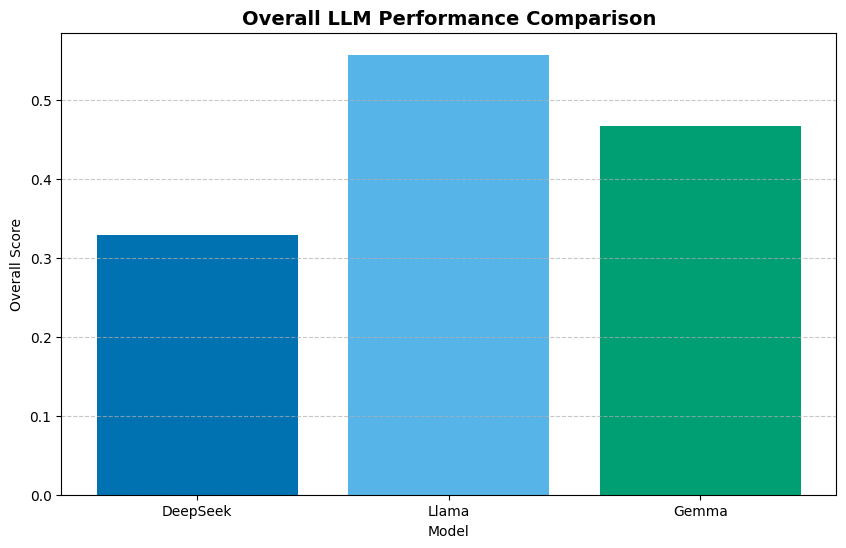

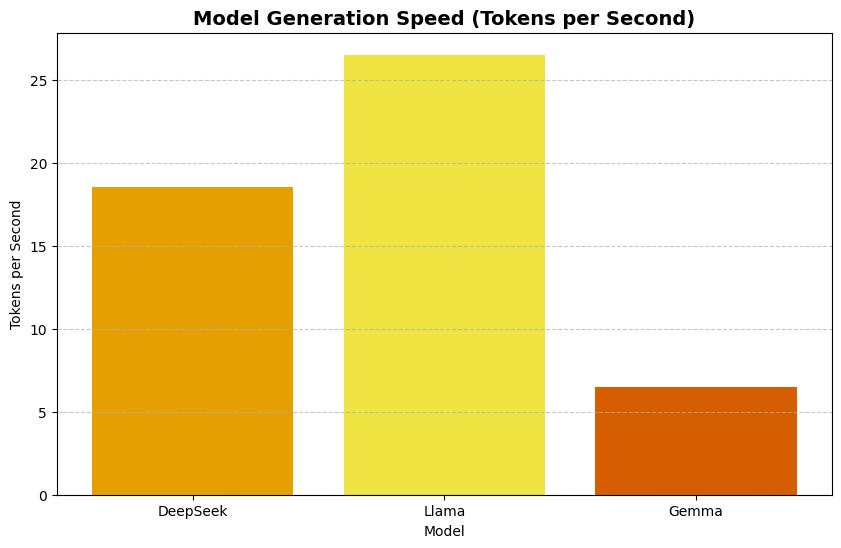

In [1]:
# Install if needed
!pip install matplotlib pandas plotly

import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# --- Updated data ---
data = {
    "model": ["DeepSeek", "Llama", "Gemma"],
    "words": [273.0, 134.0, 165.0],
    "sentences": [14.0, 4.0, 6.9],
    "vocab_diversity": [0.579, 0.503, 0.455],
    "relevance": [0.554, 0.766, 0.663],
    "completeness": [0.127, 0.349, 0.321],
    "coherence": [0.285, 0.558, 0.369],
    "overall_score": [0.329, 0.557, 0.467],
    "gen_time_s": [16.14, 5.76, 143.95],
    "tokens_per_s": [18.59, 26.54, 6.49]
}

df = pd.DataFrame(data)

# --- Bar Chart: Overall Comparison ---
plt.figure(figsize=(10, 6))
plt.bar(df["model"], df["overall_score"], color=['#0072B2', '#56B4E9', '#009E73'])
plt.title("Overall LLM Performance Comparison", fontsize=14, weight='bold')
plt.xlabel("Model")
plt.ylabel("Overall Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Radar Chart (Spider plot): Metric Comparison ---
metrics = ["vocab_diversity", "relevance", "completeness", "coherence", "overall_score"]
fig = go.Figure()

for i, row in df.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=[row[m] for m in metrics],
        theta=metrics,
        fill='toself',
        name=row["model"]
    ))

fig.update_layout(
    title="Model Metric Comparison (Radar Chart)",
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    showlegend=True
)
fig.show()

# --- Efficiency Chart ---
plt.figure(figsize=(10, 6))
plt.bar(df["model"], df["tokens_per_s"], color=['#E69F00', '#F0E442', '#D55E00'])
plt.title("Model Generation Speed (Tokens per Second)", fontsize=14, weight='bold')
plt.xlabel("Model")
plt.ylabel("Tokens per Second")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Heatmap — Correlation Between Metrics
This shows relationships between all metrics (e.g., if coherence correlates with completeness or relevance).


===== Final Accuracy Results =====
                       model  final_accuracy
0    meta-llama-Llama-3.2-3B          96.667
1                Gemma-7B-IT          93.334
2  DeepSeek-R1-0528-Qwen3-8B          35.000


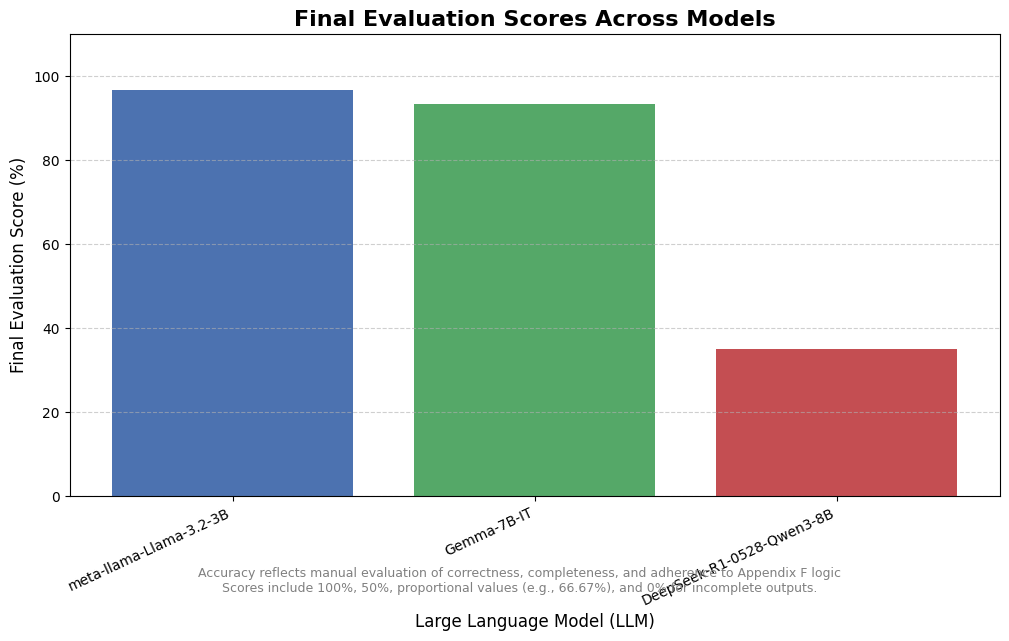

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go


# Updated final evaluation scores
accuracy_data = {
    "model": [
        "meta-llama-Llama-3.2-3B",
        "Gemma-7B-IT",
        "DeepSeek-R1-0528-Qwen3-8B"
    ],
    "final_accuracy": [96.667, 93.334, 35.000]
}

acc_df = pd.DataFrame(accuracy_data)

print("\n===== Final Accuracy Results =====")
print(acc_df)

# ---------------------------------------------
# BAR CHART — Final Evaluation Scores
# ---------------------------------------------
plt.figure(figsize=(12, 6))
plt.bar(
    acc_df["model"],
    acc_df["final_accuracy"],
    color=["#4C72B0", "#55A868", "#C44E52"]
)

plt.title("Final Evaluation Scores Across Models", fontsize=16, weight='bold')
plt.xlabel("Large Language Model (LLM)", fontsize=12)
plt.ylabel("Final Evaluation Score (%)", fontsize=12)
plt.xticks(rotation=25, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(0, 110)

# Footer
plt.figtext(
    0.5, -0.05,
    "Accuracy reflects manual evaluation of correctness, completeness, and adherence to Appendix F logic\n"
    "Scores include 100%, 50%, proportional values (e.g., 66.67%), and 0% for incomplete outputs.",
    ha="center", fontsize=9, color='gray'
)

plt.show()

# ---------------------------------------------
# RADAR CHART — Comparison of Final Accuracy
# ---------------------------------------------
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=acc_df["final_accuracy"],
    theta=acc_df["model"],
    fill='toself',
    name="Final Accuracy (%)"
))

fig.update_layout(
    title="Accuracy Comparison Radar Chart",
    polar=dict(radialaxis=dict(visible=True, range=[0, 100])),
    showlegend=True
)

fig.show()
